<a href="https://colab.research.google.com/github/EridOv/Inferencia-Causal-/blob/main/Copia_de_Causal_Inference_A22_Ex01_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ericka Deyanira Ovando B.
MCIC 

# Análisis de salarios entre hombres y mujeres

Supongamos que trabajamos como _data scientists_ en una empresa y se nos proporciona un conjunto de datos sobre los salarios entre hombres y mujeres en la compañía.

Con este conjunto de datos se nos pide contestar **¿cuál es la brecha de paga entre hombres y mujeres en la empresa?**

## Preliminares

Importa los módulos/paquetes necesarios.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm

Definición de funciones auxiliares usadas.

In [ ]:
def generate_data(**kwargs):
  raise NotImplementedError

def read_data(**kwargs):
  csv_filename = kwargs["csv_filename"]
  return pd.read_csv(csv_filename, index_col=0)

La variable `ENV` debe tener valor `"HW"` cuando está en modo de tarea.

In [ ]:
ENV = "HW"

In [ ]:
get_data = read_data if ENV == "HW" else generate_data

## Inicio

Lee los datos desde el archivo `ex_01_wages.csv` con la función `read_data` definida arriba.

In [ ]:
kwargs = {
    "csv_filename": "https://raw.githubusercontent.com/ccaballeroh/InferenciaCausal_A22/main/data/ex_01_wages.csv"
}

datos = (get_data(**kwargs))

if not ENV == "HW":
  datos.to_csv("ex_01_wages.csv")

## Análisis exploratorio de datos

Veamos las primeras líneas del conjunto de datos guardado en el DataFrame llamado `data`.

In [ ]:

datos.head()# Llama el método `head()` del DataFrame

,sexo,puesto,salario
index,,,
0,Hombre,No gerencial,24092.767040
1,Mujer,No gerencial,25574.011864
2,Hombre,Gerencial,39051.930008
3,Mujer,No gerencial,26058.226921
4,Hombre,Gerencial,44688.832593


Imprime el tipo de dato de las columnas de `data`.

In [ ]:
datos.dtypes# Llama el atributo `dtypes` del DataFrame

sexo        object
puesto      object
salario    float64
dtype: object

Imprime el resumen del conjunto de datos.

In [ ]:

datos.describe(percentiles=None,
                   include=['object','float','int'],
                   exclude=None,
                   datetime_is_numeric=False) # Llama al método `describe()` con el argumento `include=['object', 'float', 'int]`

,sexo,puesto,salario
count,200,200,200.000000
unique,2,2,NaN
top,Mujer,No gerencial,NaN
freq,105,146,NaN
mean,NaN,NaN,35155.418105
std,NaN,NaN,8506.795221
min,NaN,NaN,17037.452191
25%,NaN,NaN,28699.515533
50%,NaN,NaN,33567.270374
75%,NaN,NaN,40003.413391


Haz una gráfica de caja de `salario` por `sexo`.

In [ ]:
datos['puesto']

index
0      No gerencial
1      No gerencial
2         Gerencial
3      No gerencial
4         Gerencial
           ...     
195    No gerencial
196    No gerencial
197    No gerencial
198       Gerencial
199    No gerencial
Name: puesto, Length: 200, dtype: object

ValueError: ignored

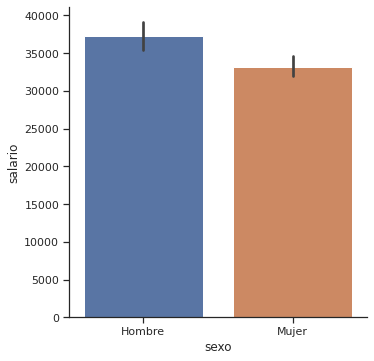

In [ ]:
# Utiliza `catplot` de Seaborn

g = sns.catplot(x=datos['sexo'], y=datos['salario'], 
                hue= None,
                kind='bar',
                data= datos)

¿Qué opinas sobre si hay o no diferencia salarial entre hombres y mujeres?
- Sí, considero segun esta primera gráfica que existe una diferencia salariar entre hombres y mujeres 

**Tu respuesta:**

Ahora, haz una gráfica de caja de `salario` por `sexo` separando por la tercera variable `puesto`.

ValueError: ignored

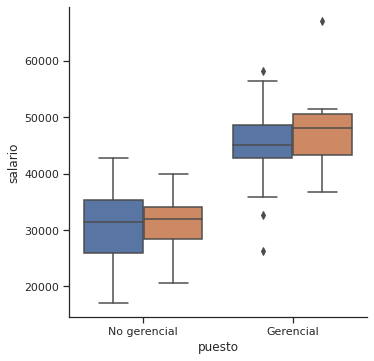

In [ ]:
from pandas.core.groupby.generic import DataFrameGroupBy
# Utiliza `catplot`

g1 = sns.catplot(x=datos['puesto'], y=datos['salario'], 
                hue= data['sexo'],
                kind='box', dodge=True,
                data= datos)

¿Cambió tu opinión? ¿Hay diferencia entre hombres y mujeres comparando por el mismo tipo de puesto?

**Tu respuesta:**

Ahora, haz una gráfica categórica de tipo `swarm` usando `catplot` de Seaborn. En el eje de las equis coloca el `puesto`; en el de las ye, `salario` y separa por `sexo`. 

ValueError: ignored

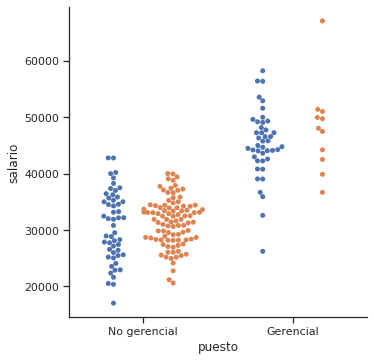

In [ ]:
# Tu código
g1 = sns.catplot(x=datos['puesto'], y=datos['salario'], 
                hue= data['sexo'],
                kind='swarm', dodge=True,
                data= datos )

¿Es mucha la diferencia en salario entre gerentes y no gerentes?

**Tu respuesta:**

Ahora haz la misma gráfica, pero invierte las variables para las equis y el _hue_.

ValueError: ignored

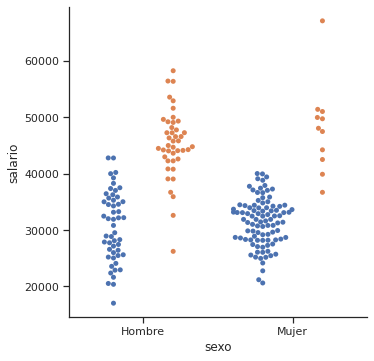

In [ ]:
# Tu código
# Tu código
g1 = sns.catplot(x=data['sexo'], y=data['salario'], 
                hue= data['puesto'],
                kind='swarm', dodge=True,
                data= datos)

¿Hay más o menos mujeres que hombres en puestos altos? ¿Y en puestos bajos?
Hay más hombres en puestos altos.

Genera una tabla de contingencia para el salario promedio y otra para el número total de personas en cada combinación de categorías.

In [ ]:
# Utiliza `crosstab` de Pandas con la función de agregación `mean` de Numpy
d=datos.groupby(datos['sexo'])
m=d.get_group('Mujer')
h=d.get_group('Hombre')
g1.head()
pd.crosstab(m['sexo'], m['salario'].mean())


col_0,33193.629669
sexo,
Mujer,105


In [ ]:
pd.crosstab(h['sexo'], h['salario'].mean())

col_0,37323.710587
sexo,
Hombre,95


In [ ]:
m['salario'].mean()-h['salario'].mean()

-4130.08091748225

In [ ]:
# Utiliza `crosstab` de Pandas. Pasa `True` al parámetro `margins`
pd.crosstab(datos['salario'], datos['sexo'], margins=True).mean()


sexo
Hombre    0.945274
Mujer     1.044776
All       1.990050
dtype: float64

## Pregunta de análisis

Para este conjunto de datos, se nos pide determinar la brecha salarial entre hombres y mujeres en la empresa en la que se recolectaron estos datos.

- Hay una diferenicia en el salario promedio de 4130. Creo que la mayor diferencia es en los puestos que ocupan las mujeres. 

**Tu respuesta:**

## Análisis guiado

## 1. Calcula el salario promedio de mujeres y hombres

- Calcula el salario promedio de las mujeres
- Calcula el salario promedio de los hombres
- Saca la diferencia

¿Quién gana más?

In [ ]:
## tu código

d=datos.groupby(datos['sexo'])
mujeres_datos=d.get_group('Mujer')
hombres_datos=d.get_group('Hombre')

promedio_mujeres= mujeres_datos['salario'].mean()
promedio_hombres= hombres_datos['salario'].mean()


##

print(
"Las mujeres ganan en promedio:", promedio_mujeres, 
"Los hombres ganan en promedio: ", promedio_hombres,

"La diferencia es ",  promedio_mujeres - promedio_hombres)

Las mujeres ganan en promedio: 33193.629669438786 Los hombres ganan en promedio:  37323.710586921035 La diferencia es  -4130.08091748225


## 2. Ahora compara por estratos

- Compara por categoría `puesto` de forma separada.

- ¿Ahora, cuál es la diferencia salarial en cada categoría?

- ¿Quién gana más en cada tipo de puesto?

In [ ]:
data.head()

,sexo,puesto,salario
index,,,
0,Hombre,No gerencial,24092.767040
1,Mujer,No gerencial,25574.011864
2,Hombre,Gerencial,39051.930008
3,Mujer,No gerencial,26058.226921
4,Hombre,Gerencial,44688.832593


In [ ]:
## Tu código
## Utiliza `groupby` para sacar el promedio salarial por puesto y sexo
## también cuenta la ocurrencia de cada combinación de categorías (i.e., 
## Gerencia y Hombre, Gerencial y Mujer, etc.)
puestos= data.groupby(puesto)
gerencia_= puestos.get_group( 'Gerencial' )
Nogerencia_= puestos.get_group( 'No gerencial' )

gerencia_mh= gerencia_.groupby('sexo')
gerencia_mujeres=gerencia_mh.get_group('Mujer')
gerencia_hombres=gerencia_mh.get_group('Hombre')

Nogerencia_mh= Nogerencia_.groupby('sexo')
Nogerencia_mujeres=Nogerencia_mh.get_group('Mujer')
Nogerencia_hombres=Nogerencia_mh.get_group('Hombre')


#data_grpd = (data
 #            .groupby([])
  #           .agg({})
   #          .rename(columns={}) #renombra la columna `sexo` a cuentas
    ##         ) 
##

#data_grpd

In [ ]:
#promedio_mujeres_gerentes = data_grpd.loc[
 #                                         [("Gerencial", "Mujer")],
 #                                         "salario"
  #                                        ].values
#promedio_hombres_gerentes = data_grpd.loc[
#                                          [("Gerencial", "Hombre")],
#                                          "salario"
#                                          ].values
promedio_mujeres_gerentes = gerencia_mujeres.mean()
promedio_hombres_gerentes = gerencia_hombres.mean()

diferencia_gerentes = (promedio_mujeres_gerentes - promedio_hombres_gerentes)[0]

print(f"""
Las mujeres gerentes ganan en promedio: ${promedio_mujeres_gerentes[0]:,.2f}
Los hombres gerentes ganan en promedio: ${promedio_hombres_gerentes[0]:,.2f}

La diferencia es ${diferencia_gerentes:,.2f}
""")


Las mujeres gerentes ganan en promedio: $48,006.10
Los hombres gerentes ganan en promedio: $45,342.80

La diferencia es $2,663.30



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#promedio_mujeres_no_gerentes = data_grpd.loc[
#                                             [("No gerencial", "Mujer")],
 #                                            "salario"].values
#promedio_hombres_no_gerentes = data_grpd.loc[
 #                                            [("No gerencial", "Hombre")],
  #                                           "salario"
   #                                          ].values

promedio_mujeres_no_gerentes = Nogerencia_mujeres.mean()
promedio_hombres_no_gerentes = Nogerencia_hombres.mean()
diferencia_no_gerentes = (promedio_mujeres_no_gerentes -
                          promedio_hombres_no_gerentes)[0]

print(f"""
Las mujeres no gerentes ganan en promedio: ${promedio_mujeres_no_gerentes[0]:,.2f}
Los hombres no gerentes ganan en promedio: ${promedio_hombres_no_gerentes[0]:,.2f}

La diferencia es ${diferencia_no_gerentes:,.2f}
""")


Las mujeres no gerentes ganan en promedio: $31,460.26
Los hombres no gerentes ganan en promedio: $30,692.54

La diferencia es $767.72



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


## Opcional

Haz una suma ponderada por la cantidad de gerentes de las diferencias anteriores.

In [ ]:
## Tu código
diferencia_ponderada = None

##

print(f"La diferencia ponderada es: ${diferencia_ponderada:,.2f}")

## Reflexión

- ¿Qué crees que sea lo que esté sucediendo? ¿Cómo es posible que al ver cada tipo de puesto la diferencia favorezca a un sexo, pero al ver la población entera la preferencia se invierte?
- Si las etiquetas de los datos fueran `estilo de vida` en lugar de `sexo`, `puesto` y `salario`, ¿cambiaría tu respuesta?

**Tu respuesta:**

# Análisis estadístico de diferencias de medias

Haz una regresión lineal `salario ~ sexo`.

Compara el coeficiente (pendiente) de la variable categórica `sexo` con el resultado que habías obtenido arriba.

¿Las diferencias son (estadísticamente) significativas?

**Tu respuesta:**

In [ ]:
uncontrolled_model = smf.ols("salario ~ sexo", data=data).fit()
uncontrolled_model.summary2()

Haz una regresión lineal `salario ~ sexo + puesto`.

Ahora, compara el coeficiente (pendiente) de la variable categórica `sexo` con el resultado _ponderado_ que habías obtenido arriba (tal vez no sea exactamente el mismo).

¿Las diferencias son (estadísticamente) significativas?

**Tu respuesta:**

In [ ]:
controlled_model = smf.ols("salario ~ sexo + puesto", data=data).fit()
controlled_model.summary2()

# Análisis con _Bootstrap_

Analiza el siguiente código para contestar las siguientes preguntas:

- ¿Qué regresa la función `estimate_statistic`?
- ¿Qué hace la línea 10 del código de la siguiente celda?
- Compara el valor de la variable `mean_difference` con los resultados obtenidos en las secciones anteriores.
- ¿Cómo se interpreta el intervalo $[\mathrm{LL}, \mathrm{UU}]$?
- ¿Cuántos elementos tiene el arreglo `bootstrap_statistcs` y por qué su histograma tiende a una distribución normal?



**Tu respuesta:**

In [ ]:
def estimate_statistic(bootstrap_sample):
  return smf.ols("salario ~ sexo", data=bootstrap_sample).fit().params[1]


N_bootstraps = 10_000
bootstrap_statistics = []


for _ in tqdm(range(N_bootstraps)):
  bootstrap_sample = data.sample(n=len(data), replace=True)
  statistic = estimate_statistic(bootstrap_sample)
  bootstrap_statistics.append(statistic)

bootstrap_statistics = np.array(bootstrap_statistics)
mean_difference = np.mean(bootstrap_statistics)
LL, UU = np.quantile(bootstrap_statistics, 0.025), np.quantile(bootstrap_statistics, 0.975)

In [ ]:
plt.plot([LL, UU], [0, 0], color="yellow", lw=5)
plt.plot([mean_difference, mean_difference], [0, 10], color="red")
sns.histplot(data=bootstrap_statistics, bins=30, kde=True)

In [ ]:
print(f"""
El valor estimado por remuestreo con reemplazo es ${mean_difference:,.2f}.
Con un intervalo de confianza de bootstrap de [${LL:,.2f}, {UU:,.2f}] al 95 %.
""")